In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.svm import SVR
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 40,30

In [3]:
df = pd.read_csv('sensex.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,27232.689453,27264.410156,27009.810547,27034.500000,27034.500000,8800.0
2017-01-23,26990.929688,27167.789063,26963.580078,27117.339844,27117.339844,6600.0
2017-01-24,27170.880859,27393.349609,27140.849609,27375.580078,27375.580078,6800.0
2017-01-25,27462.830078,27736.830078,27439.679688,27708.140625,27708.140625,12200.0
2017-01-27,27761.029297,27980.390625,27759.480469,27882.460938,27882.460938,14300.0


In [4]:
data = df.drop(['High', 'Open'], axis = 1)

In [5]:
df = data.drop(['Low', 'Volume'], axis = 1)

In [6]:
df = df.drop(['Adj Close'], axis = 1)

In [7]:
df = df['2017-01-25' : ]
df[df==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df.dropna()

,Close
Date,
2017-01-25,27708.140625
2017-01-27,27882.460938
2017-01-30,27849.560547
2017-01-31,27655.960938
2017-02-01,28141.640625
2017-02-02,28226.609375
2017-02-03,28240.519531
2017-02-06,28439.279297
2017-02-07,28335.160156


In [8]:
df = df.dropna()
df.asfreq('D', method="pad")

,Close
Date,
2017-01-25,27708.140625
2017-01-26,27708.140625
2017-01-27,27882.460938
2017-01-28,27882.460938
2017-01-29,27882.460938
2017-01-30,27849.560547
2017-01-31,27655.960938
2017-02-01,28141.640625
2017-02-02,28226.609375


In [9]:
X = df.values
Y = df.values

In [10]:
import statsmodels.api as sm

In [11]:
 dta = sm.datasets.macrodata.load_pandas().data

In [17]:
cycle, trend = sm.tsa.filters.hpfilter(X, 129600)

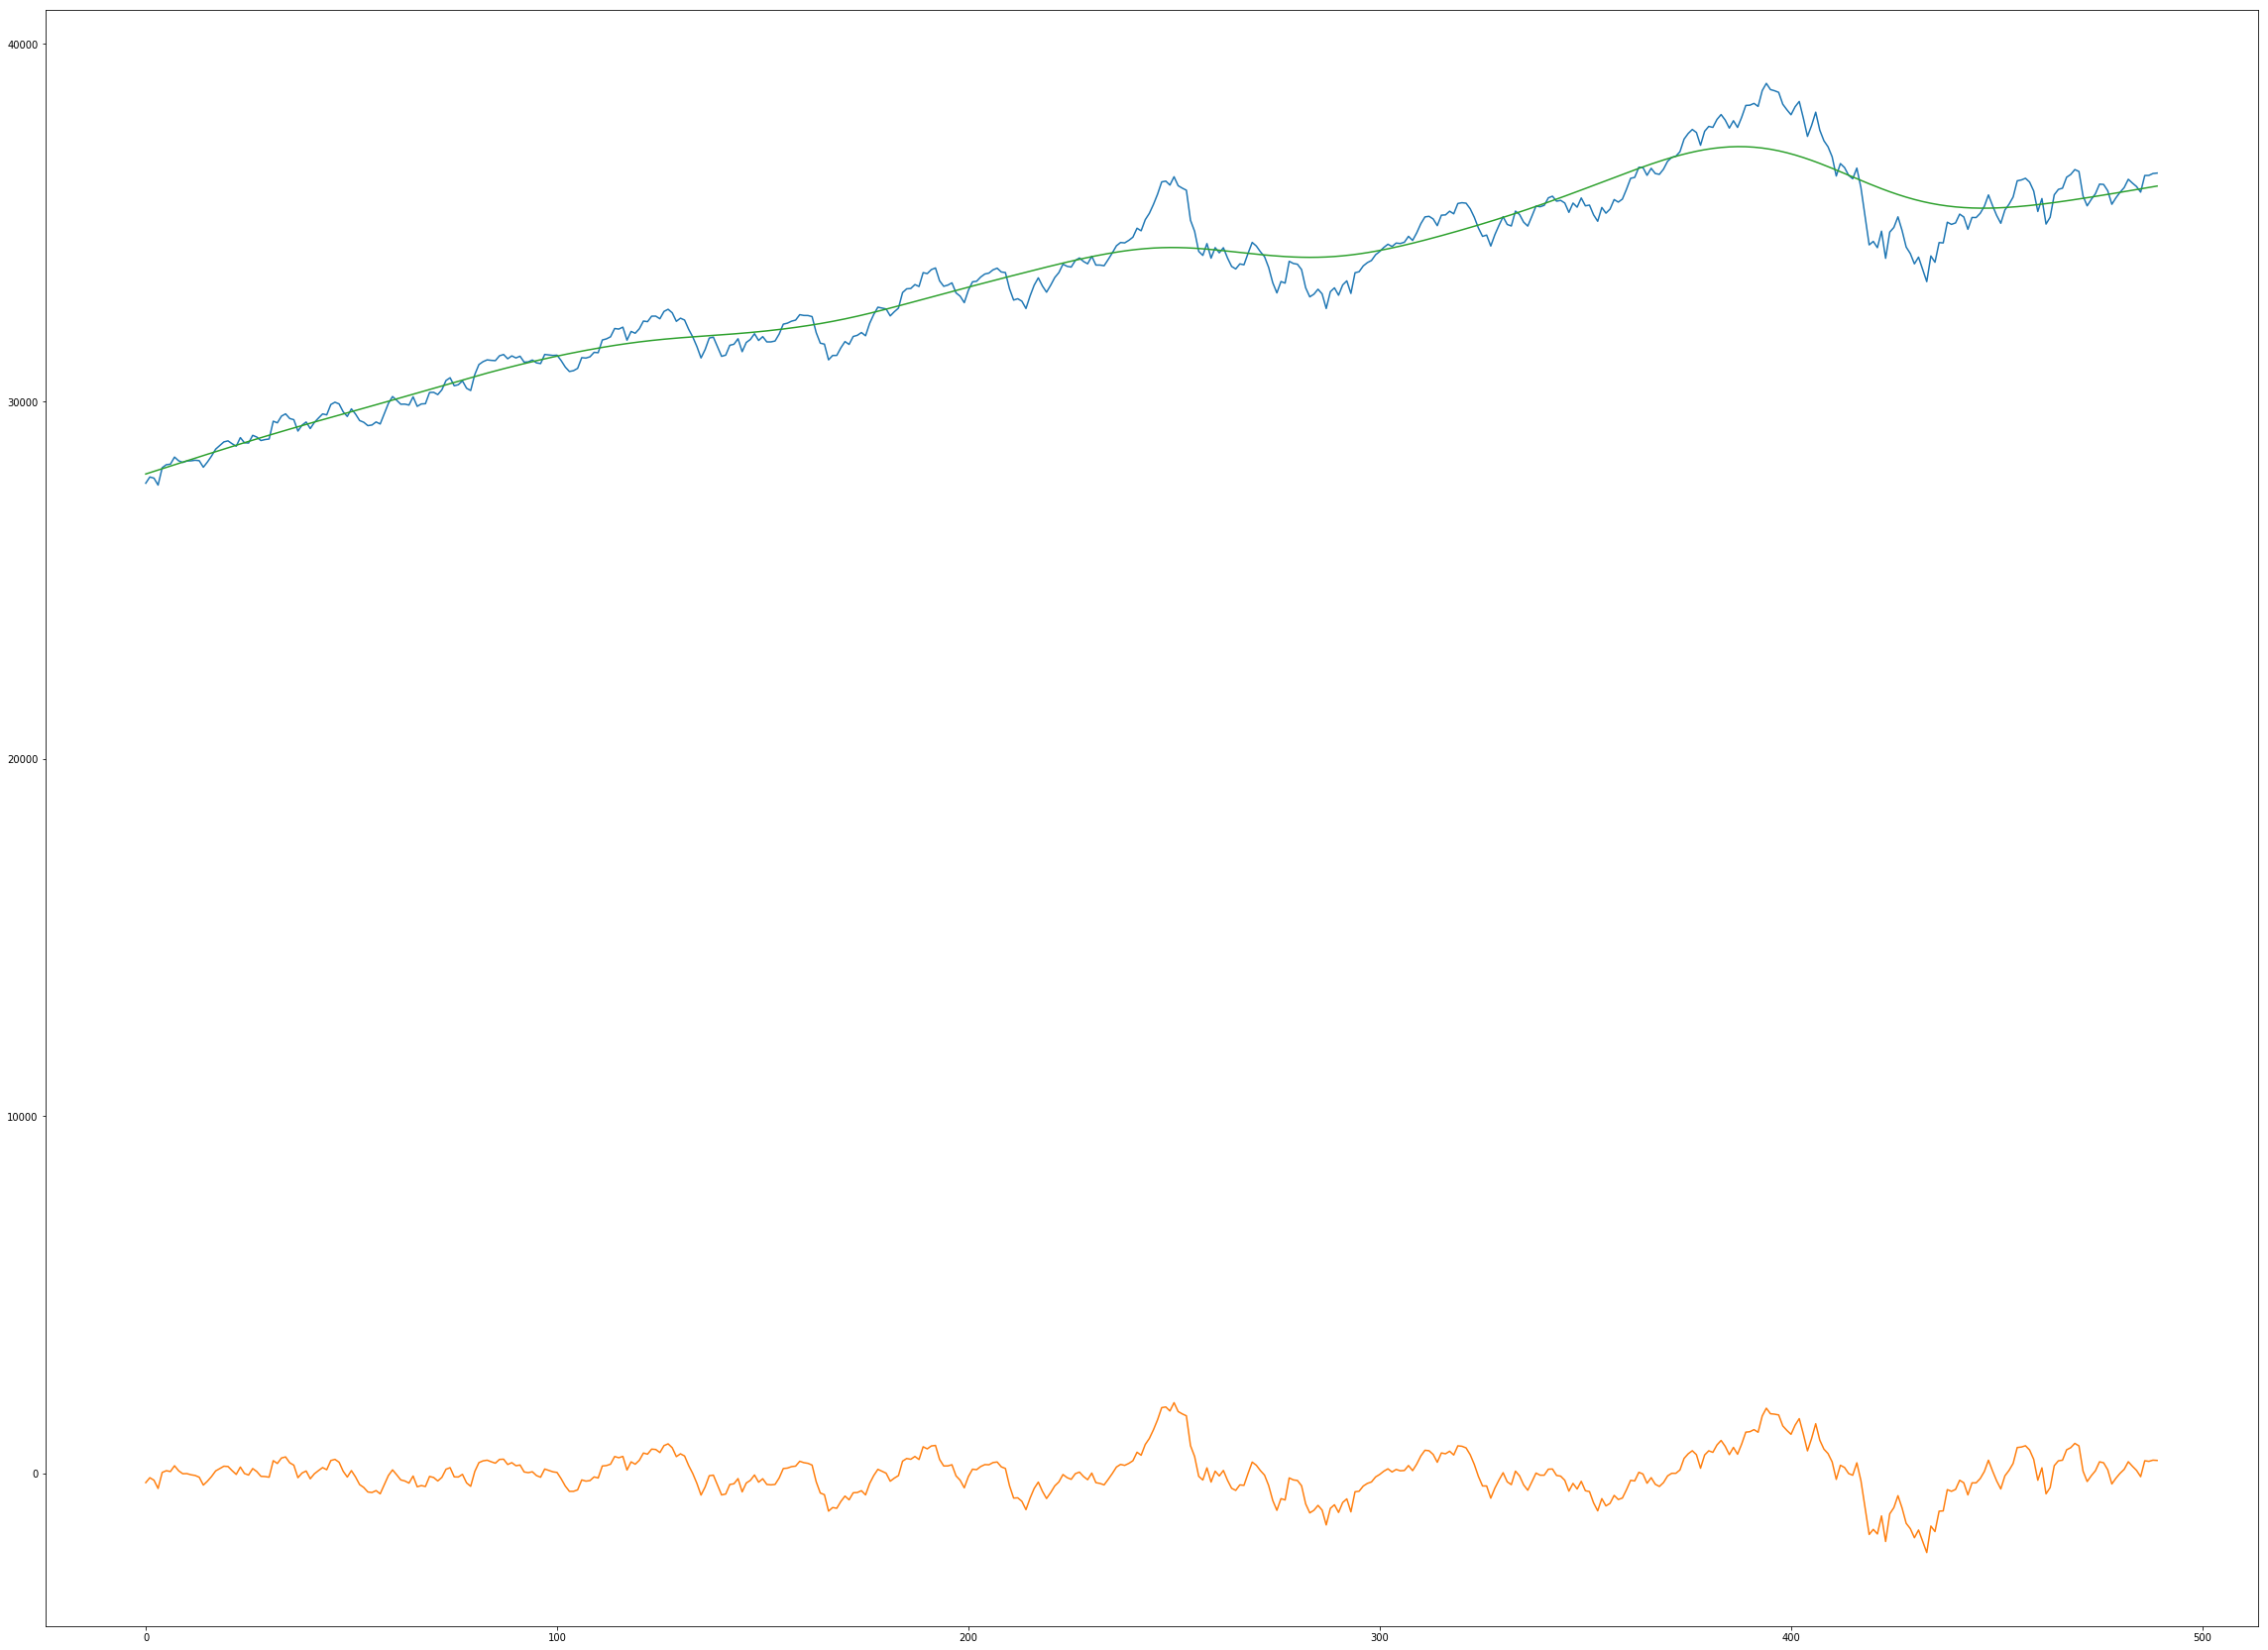

In [18]:
plt.plot(X)
plt.plot(cycle)
plt.plot(trend)

In [19]:
cycle, trend = sm.tsa.filters.hpfilter(X, 1600)

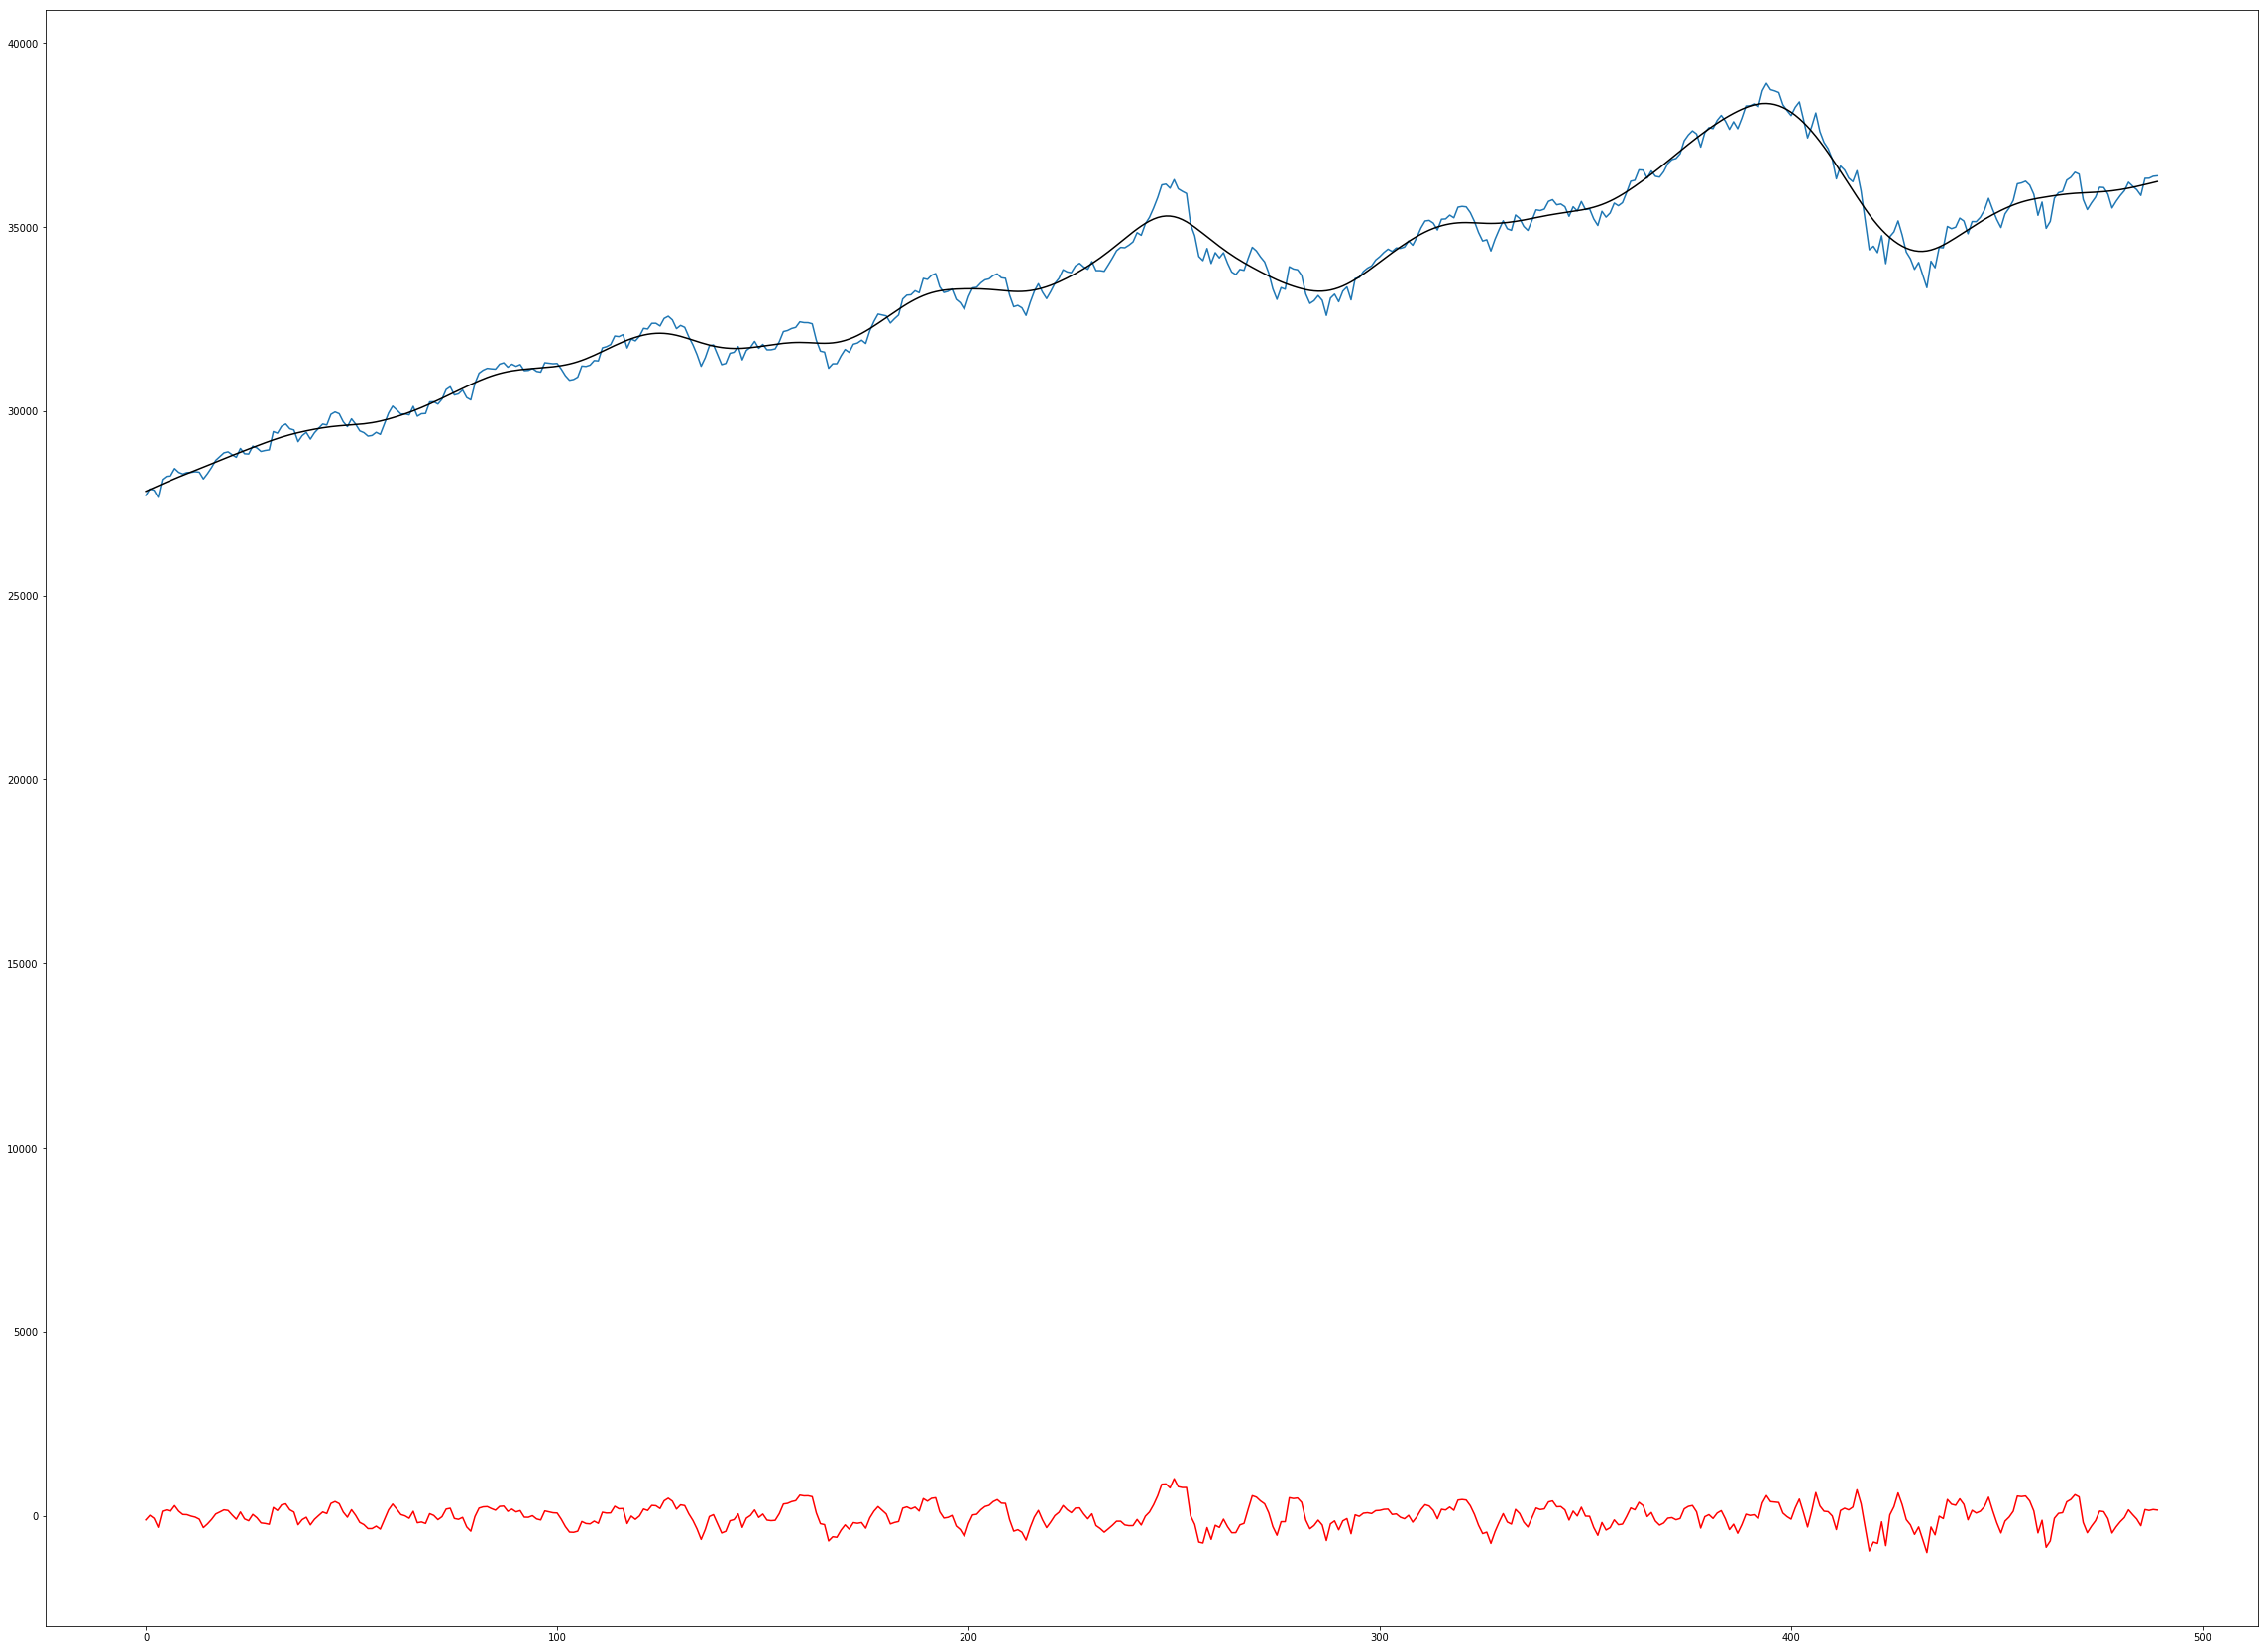

In [20]:
plt.plot(X)
plt.plot(cycle, color = 'red')
plt.plot(trend, color='black')

In [21]:
train = cycle[:480]
test = cycle[480 : ]
predictions = []

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
model_arima = ARIMA(train,order=(4,0,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

6444.442768089042


/home/umang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [24]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([-238.90007762,  -99.42448461,  -74.72499266,   -2.95643044,
         67.71367738,   48.5657995 ,  110.19964102,  103.87226498,
         80.28379681,  116.9361477 ])

In [25]:
#predictions = predictions + trend[470:490]

In [26]:
test

array([-161.81233068,  -50.14489461,  160.84566127,   31.85281505,
        -88.78829976, -270.27417563,  168.29715665,  144.46533864,
        170.16091719,  155.5014953 ])

In [27]:
trend[480:]

array([36011.97248668, 36031.07458261, 36052.06449473, 36074.64718495,
       36098.62814376, 36123.83276963, 36150.03096835, 36176.82372436,
       36203.91720781, 36231.1078797 ])

In [28]:
trend[480:] + cycle[480:]

array([35850.160156, 35980.929688, 36212.910156, 36106.5     ,
       36009.839844, 35853.558594, 36318.328125, 36321.289063,
       36374.078125, 36386.609375])

In [29]:
temp = trend[480:] + predictions
temp

array([35773.07240906, 35931.650098  , 35977.33950206, 36071.69075451,
       36166.34182114, 36172.39856913, 36260.23060937, 36280.69598934,
       36284.20100462, 36348.0440274 ])

In [30]:
Y[480:]

array([[35850.160156],
       [35980.929688],
       [36212.910156],
       [36106.5     ],
       [36009.839844],
       [35853.558594],
       [36318.328125],
       [36321.289063],
       [36374.078125],
       [36386.609375]])

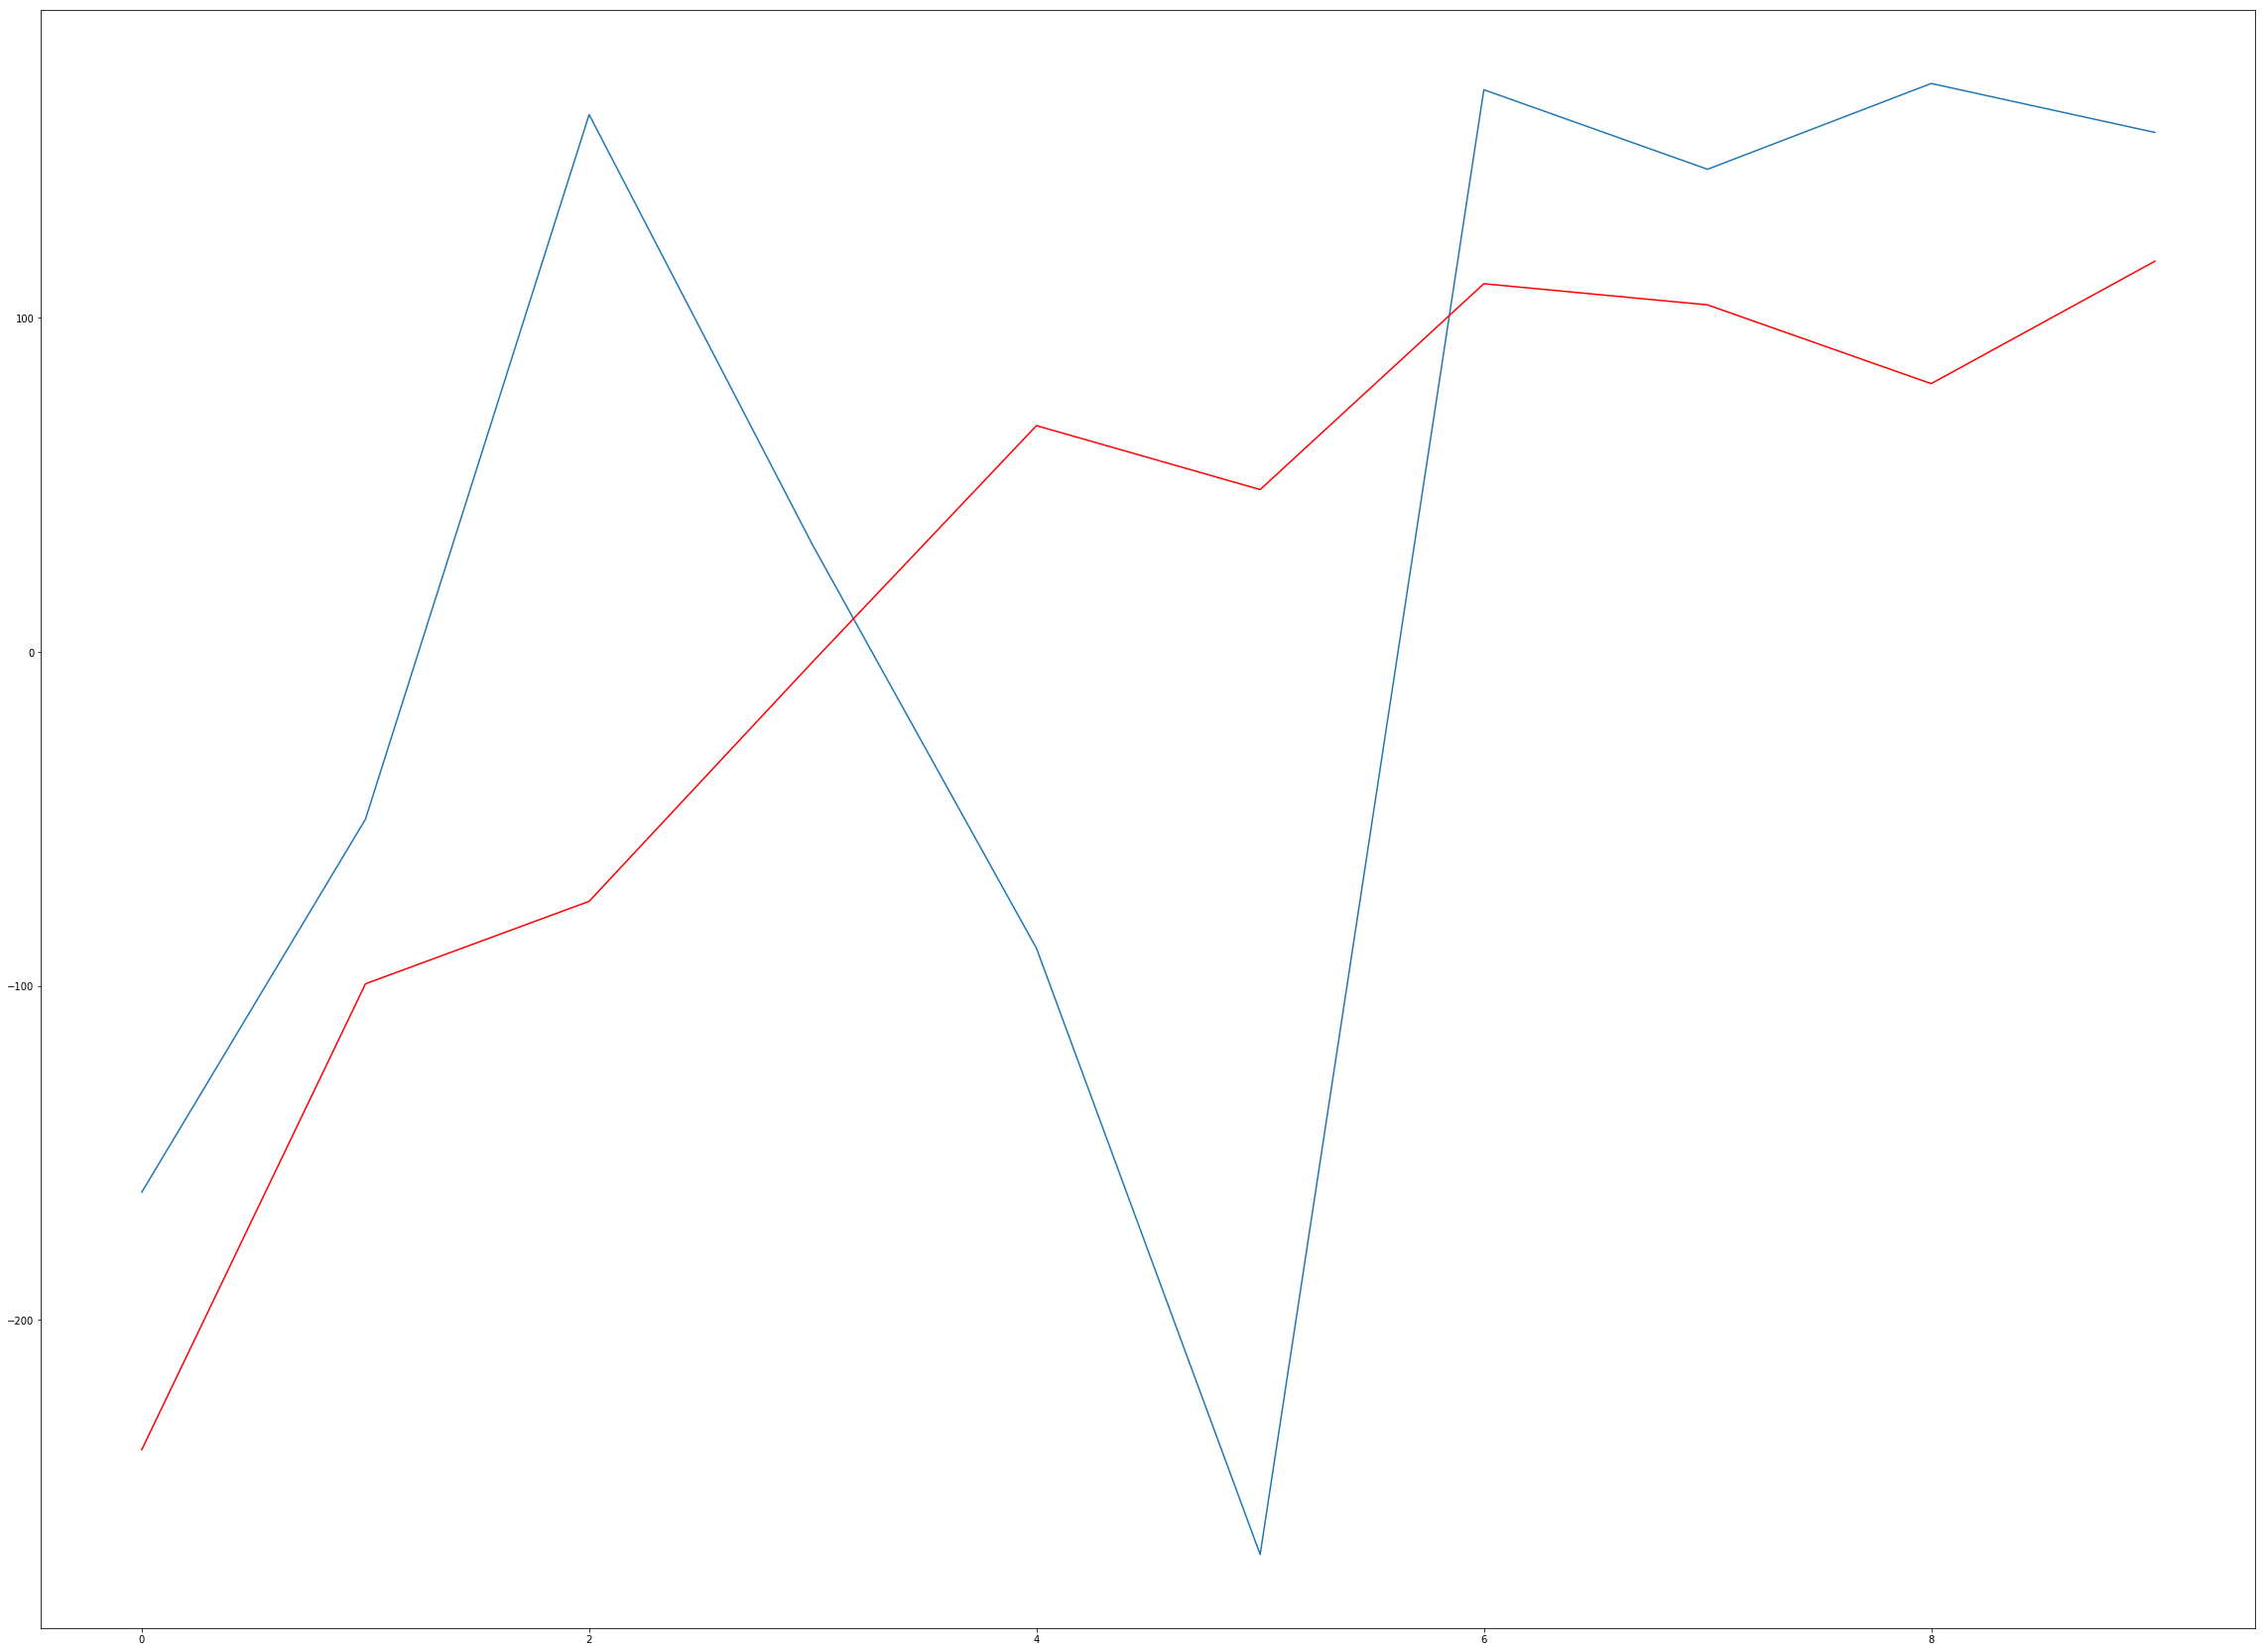

In [31]:
plt.plot(test)
plt.plot(predictions,color='red')

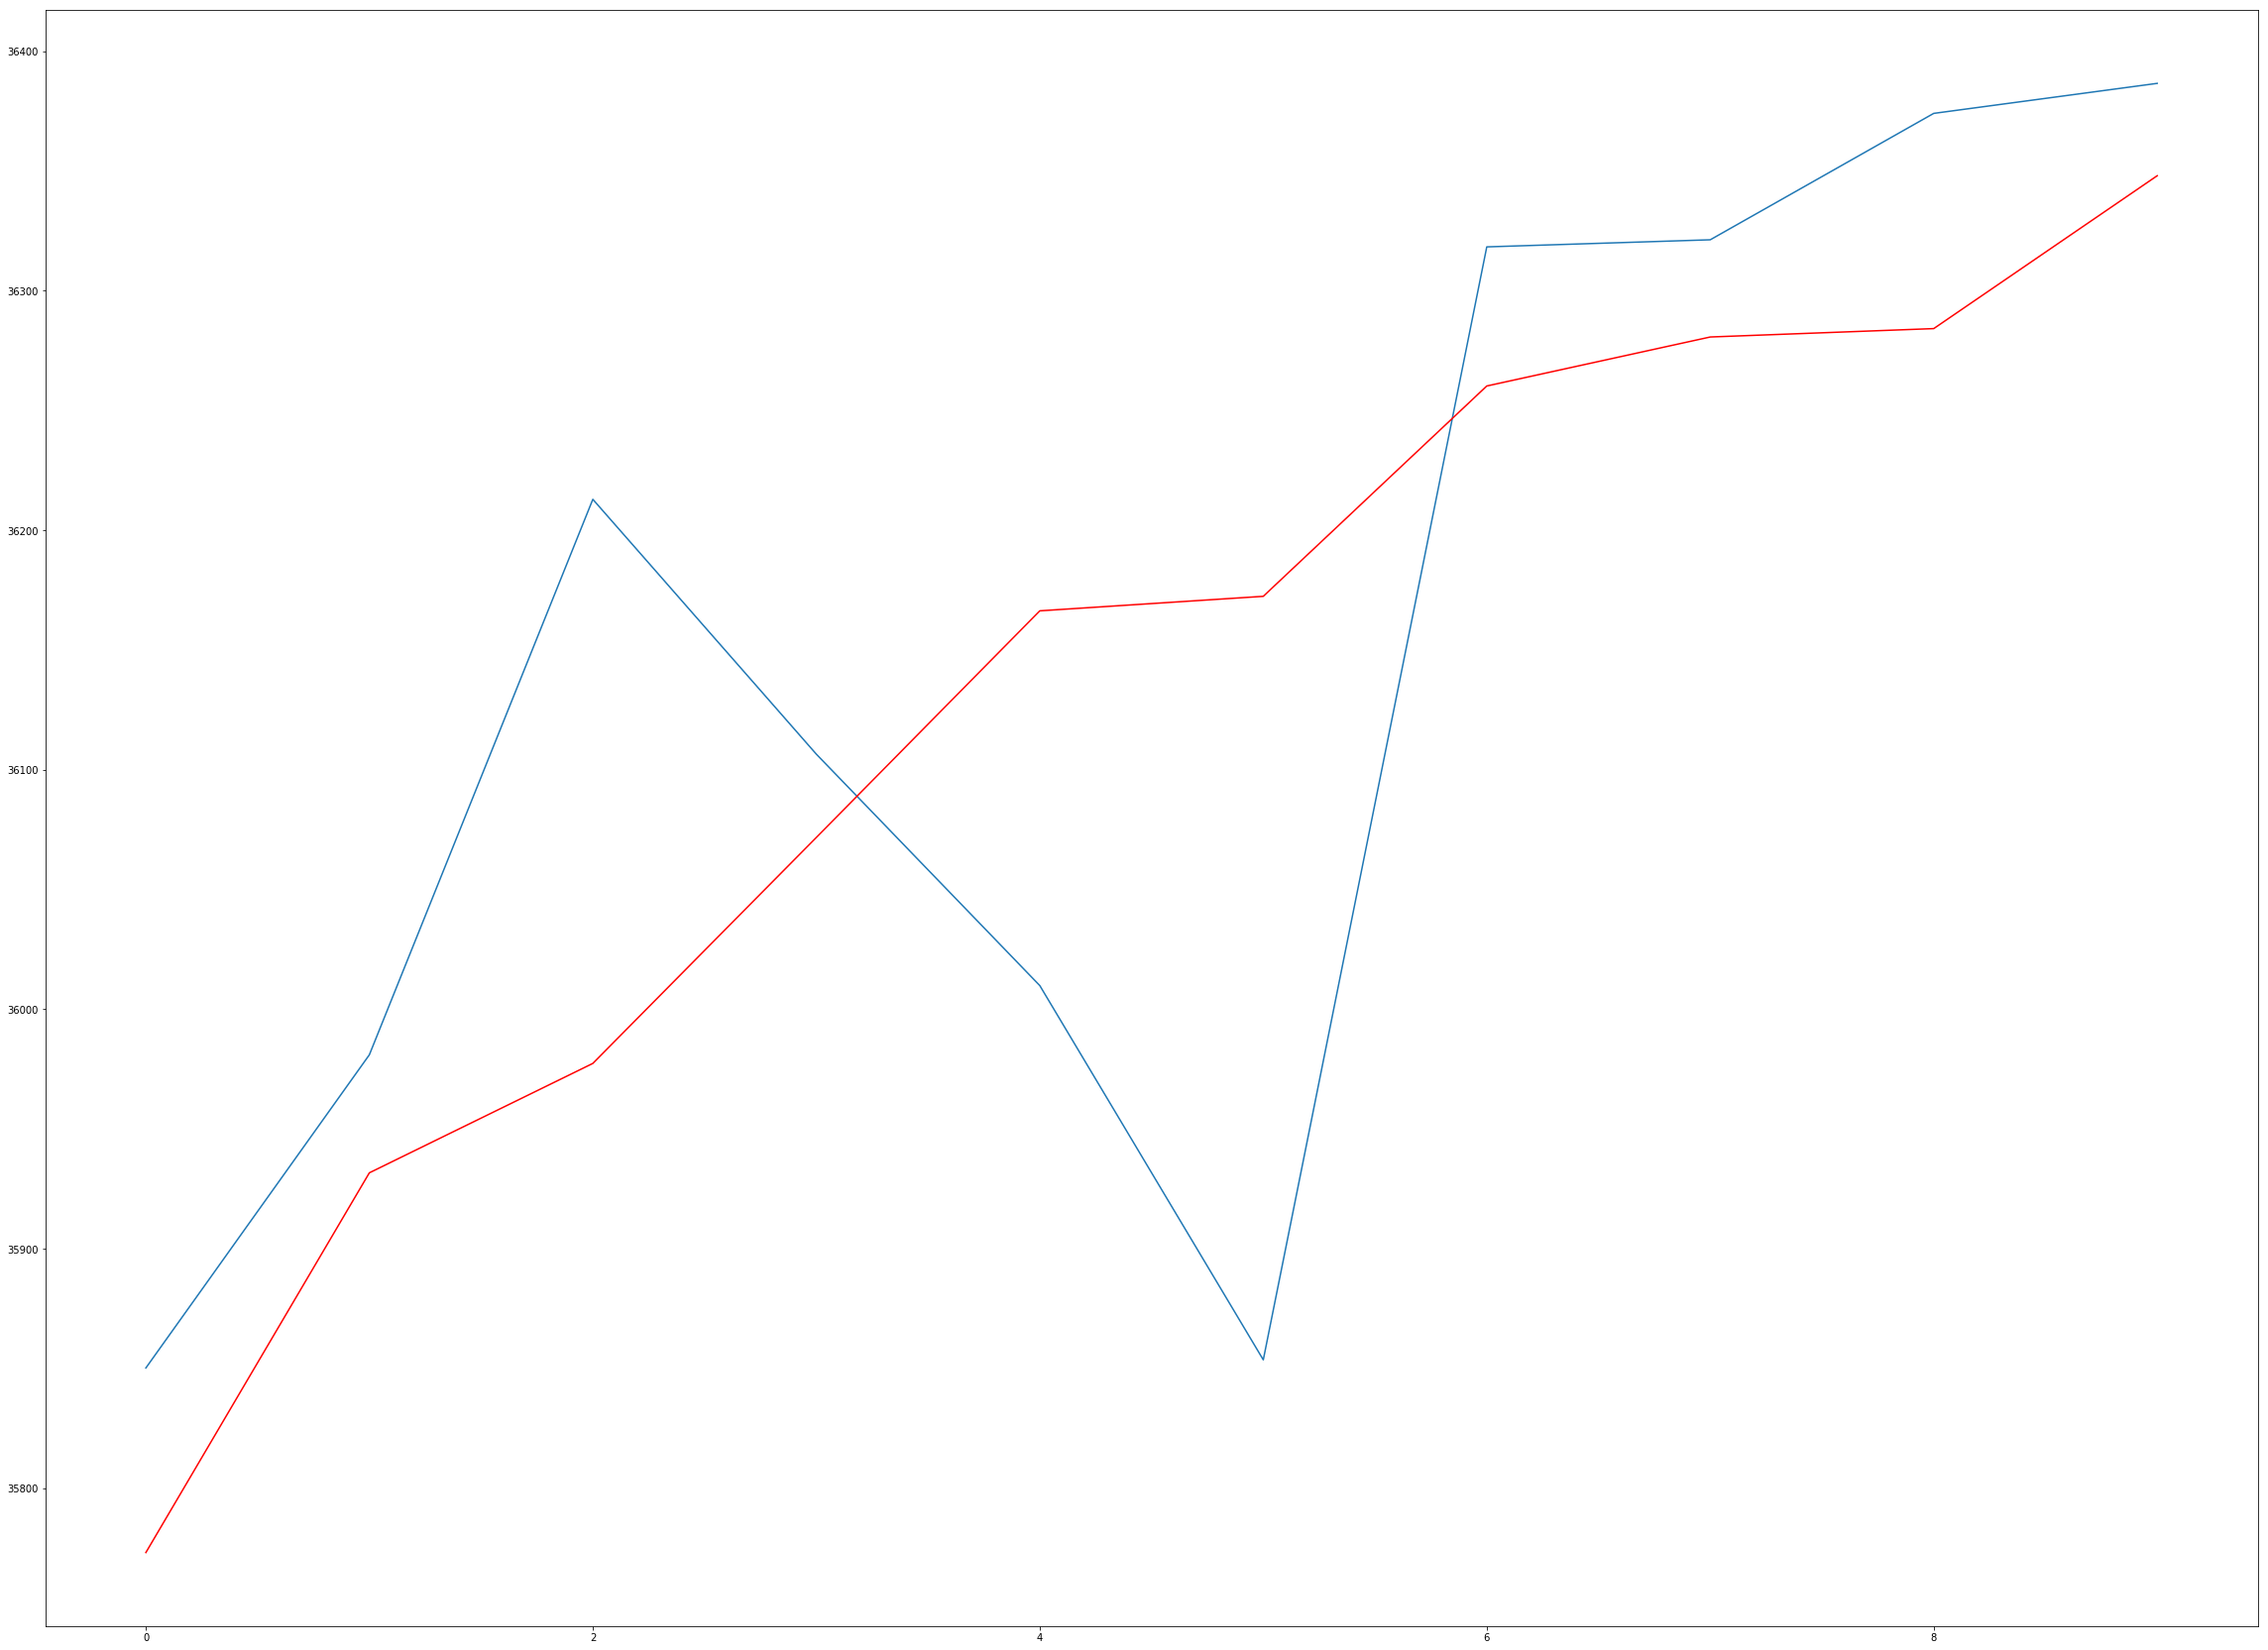

In [32]:
plt.plot(Y[480:])
plt.plot(temp, color='red')

In [33]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(Y[480:], temp)

20581.631563076022

In [36]:
rms = np.sqrt(np.mean(np.power(Y[480:]-temp,2)))
rms

265.4499339680735